In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0


x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

num_classes = 10
y_train_categorical = keras.utils.to_categorical(y_train, num_classes)
y_test_categorical = keras.utils.to_categorical(y_test, num_classes)

In [2]:
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [3]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
batch_size = 128
epochs = 15

history = model.fit(
    x_train, 
    y_train_categorical, 
    batch_size=batch_size, 
    epochs=epochs, 
    validation_split=0.1
)

Epoch 1/15
422/422 [==============================] - 18s 40ms/step - loss: 0.3640 - accuracy: 0.8897 - val_loss: 0.0833 - val_accuracy: 0.9767
Epoch 2/15
422/422 [==============================] - 18s 41ms/step - loss: 0.1120 - accuracy: 0.9658 - val_loss: 0.0554 - val_accuracy: 0.9857
Epoch 3/15
422/422 [==============================] - 19s 45ms/step - loss: 0.0857 - accuracy: 0.9737 - val_loss: 0.0503 - val_accuracy: 0.9865
Epoch 4/15
422/422 [==============================] - 18s 43ms/step - loss: 0.0700 - accuracy: 0.9784 - val_loss: 0.0412 - val_accuracy: 0.9897
Epoch 5/15
422/422 [==============================] - 17s 40ms/step - loss: 0.0613 - accuracy: 0.9812 - val_loss: 0.0447 - val_accuracy: 0.9873
Epoch 6/15
422/422 [==============================] - 19s 44ms/step - loss: 0.0557 - accuracy: 0.9826 - val_loss: 0.0399 - val_accuracy: 0.9898
Epoch 7/15
422/422 [==============================] - 22s 52ms/step - loss: 0.0509 - accuracy: 0.9838 - val_loss: 0.0351 - val_accuracy:


--- Model Evaluation ---
Test loss: 0.0247
Test accuracy: 99.23%


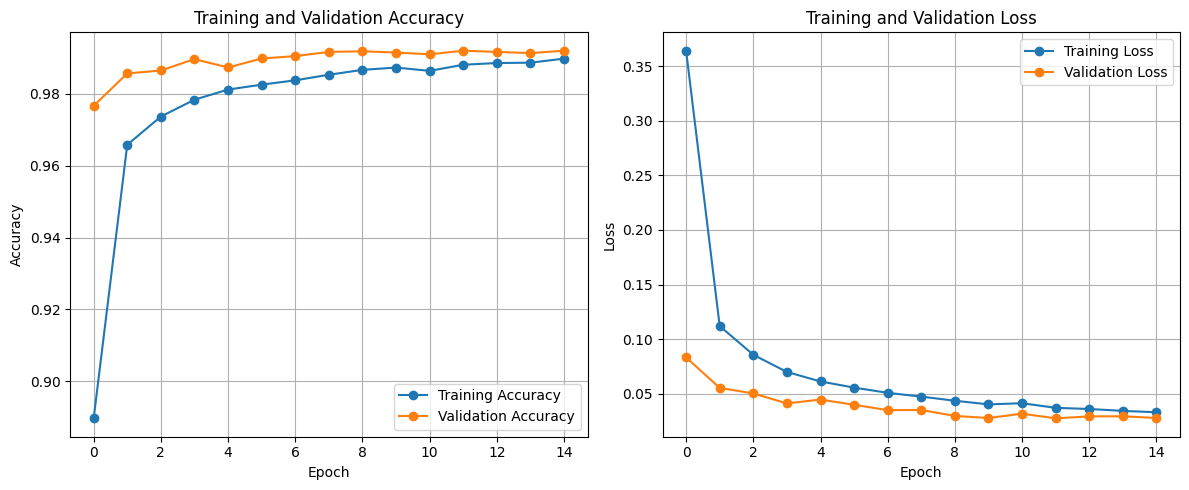

In [4]:
score = model.evaluate(x_test, y_test_categorical, verbose=0)
print("\n--- Model Evaluation ---")
print(f"Test loss: {score[0]:.4f}")
print(f"Test accuracy: {score[1] * 100:.2f}%")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

313/313 [==============================] - 1s 3ms/step
Total test images: 10000
Displaying examples with their predicted labels:


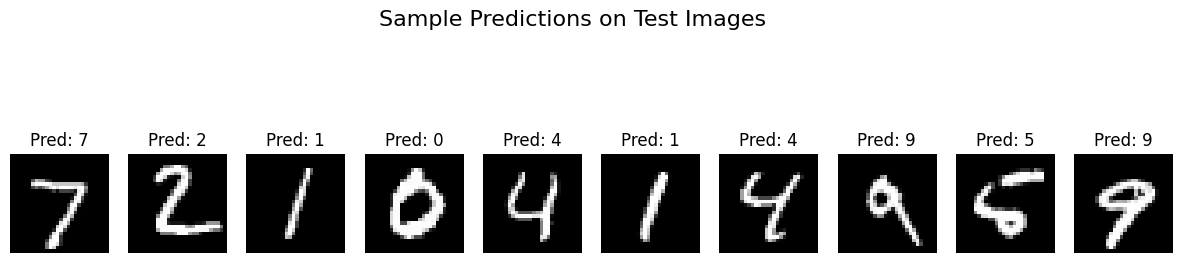

In [6]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

print(f"Total test images: {len(x_test)}")
print("Displaying examples with their predicted labels:")

    
num_samples = 10
plt.figure(figsize=(15, 4))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    image_to_show = x_test[i].reshape(28, 28)
    plt.imshow(image_to_show, cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}")
    plt.axis('off')
plt.suptitle("Sample Predictions on Test Images", fontsize=16)
plt.show()

In [7]:
model.save('exp2.h5')